# Analysis of hip ROIs

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import importlib
from bender import rsa
from bender import figures

rsa_dir = '/Users/morton/Dropbox/work/bender/batch/rsa'
fig_dir = '/Users/morton/Dropbox/work/bender/figs_wikisim2/rois'
if not os.path.exists(fig_dir):
    os.makedirs(fig_dir)

# controls plot precision; use 1000 for testing, 100000 for final
opt = {'n_perm': 100000, 'n_boot': 100000, 
       'max_offset': 4, 'sig_offset': 3.5}
figsize = (3.5, 2.5)

rois = rsa.define_network(['hmx_use_face_hip_dil2', 'hmx_use_scene_hip_dil2'],
                          ['Face cluster', 'Scene cluster'], [0, 0], 
                          ['cluster1', 'cluster2'], ['cluster1', 'cluster2'])

## Face semantics

Controlling for just the visual model, adding gender, and adding occupation.

In [2]:
zstat_face_hmx_use = rsa.load_net_zstat(rsa_dir, 'prsa_hmx_use', 'face', rois)
zstat_face_hmx_sub_use = rsa.load_net_zstat(rsa_dir, 'prsa_hmx_sub_use', 'face', rois)
zstat_face_hmx_sub_occ_use = rsa.load_net_zstat(rsa_dir, 'prsa_hmx_sub_occ_use', 'face', rois)

,mean,sem,p,p_cor
Face cluster,0.517406,0.161801,0.001470,0.000985
Scene cluster,-0.050407,0.166232,0.620504,0.612759


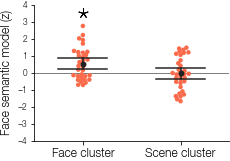

In [3]:
fig, ax = plt.subplots(figsize=figsize)
sig = figures.plot_zstat_perm(zstat_face_hmx_use, 'wiki_use1', 'face', ax=ax, **opt)
fig.savefig(os.path.join(fig_dir, 'prsa_hip_face_use.pdf'))
sig

,mean,sem,p,p_cor
Face cluster,0.509107,0.161624,0.001560,0.001135
Scene cluster,-0.057071,0.167956,0.632754,0.625924


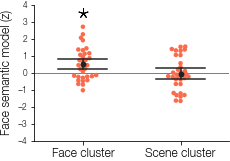

In [4]:
fig, ax = plt.subplots(figsize=figsize)
sig = figures.plot_zstat_perm(zstat_face_hmx_sub_use, 'wiki_use1', 'face', ax=ax, **opt)
fig.savefig(os.path.join(fig_dir, 'prsa_hip_face_sub_use.pdf'))
sig

,mean,sem,p,p_cor
Face cluster,0.515496,0.122580,0.000110,0.001530
Scene cluster,-0.013042,0.195262,0.525445,0.530795


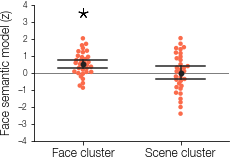

In [5]:
fig, ax = plt.subplots(figsize=figsize)
sig = figures.plot_zstat_perm(zstat_face_hmx_sub_occ_use, 'wiki_use1', 'face', ax=ax, **opt)
fig.savefig(os.path.join(fig_dir, 'prsa_hip_face_sub_occ_use.pdf'))
sig

## Scene semantics

Controlling for just the visual model, then adding visual category and subcategory.

In [6]:
zstat_scene_hmx_use = rsa.load_net_zstat(rsa_dir, 'prsa_hmx_use', 'scene', rois)
zstat_scene_hmx_sub_typ_use = rsa.load_net_zstat(rsa_dir, 'prsa_hmx_sub_typ_use', 'scene', rois)

,mean,sem,p,p_cor
Face cluster,0.163309,0.209386,0.219418,0.209193
Scene cluster,0.578959,0.164726,0.000590,0.001200


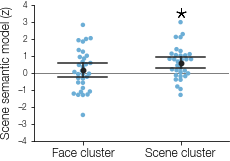

In [7]:
fig, ax = plt.subplots(figsize=figsize)
sig = figures.plot_zstat_perm(zstat_scene_hmx_use, 'wiki_use1', 'scene', ax=ax, **opt)
fig.savefig(os.path.join(fig_dir, 'prsa_hip_scene_use.pdf'))
sig

,mean,sem,p,p_cor
Face cluster,0.152310,0.178970,0.200278,0.188418
Scene cluster,0.401854,0.145703,0.004360,0.007805


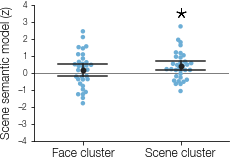

In [8]:
fig, ax = plt.subplots(figsize=figsize)
sig = figures.plot_zstat_perm(zstat_scene_hmx_sub_typ_use, 'wiki_use1', 'scene', ax=ax, **opt)
fig.savefig(os.path.join(fig_dir, 'prsa_hip_scene_sub_typ_use.pdf'))
sig

## Scene geography

In [9]:
zstat_scene_hmx_use_geo = rsa.load_net_zstat(rsa_dir, 'prsa_hmx_use_geo', 'scene', rois)
zstat_scene_hmx_reg_use_geo = rsa.load_net_zstat(rsa_dir, 'prsa_hmx_use_reg_geo', 'scene', rois)

,mean,sem,p,p_cor
Face cluster,0.205497,0.165539,0.110239,0.096954
Scene cluster,-0.165235,0.146851,0.865011,0.850701


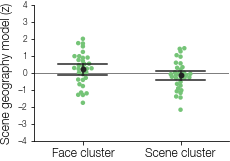

In [10]:
fig, ax = plt.subplots(figsize=figsize)
sig = figures.plot_zstat_perm(zstat_scene_hmx_use_geo, 'geo', 'geo', ax=ax, **opt)
fig.savefig(os.path.join(fig_dir, 'prsa_hip_use_geo.pdf'))
sig

,mean,sem,p,p_cor
Face cluster,0.004161,0.230210,0.493085,0.492310
Scene cluster,-0.044122,0.179497,0.596164,0.585314


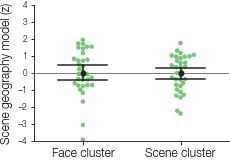

In [11]:
fig, ax = plt.subplots(figsize=figsize)
sig = figures.plot_zstat_perm(zstat_scene_hmx_reg_use_geo, 'geo', 'geo', ax=ax, **opt)
fig.savefig(os.path.join(fig_dir, 'prsa_hip_reg_use_geo.pdf'))
sig